In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
import pathlib

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
print(tf.__version__)


2.4.1


In [4]:
data_dir = pathlib.Path("/home/divyanshu/Documents/Datasets/catvsdog/training_set")

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8005


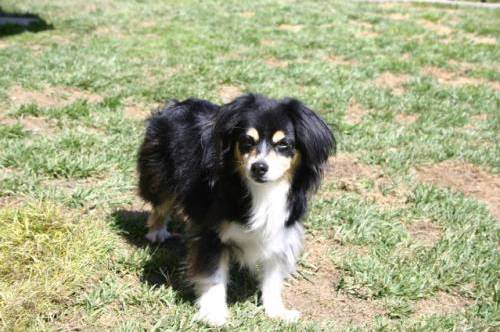

In [6]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))


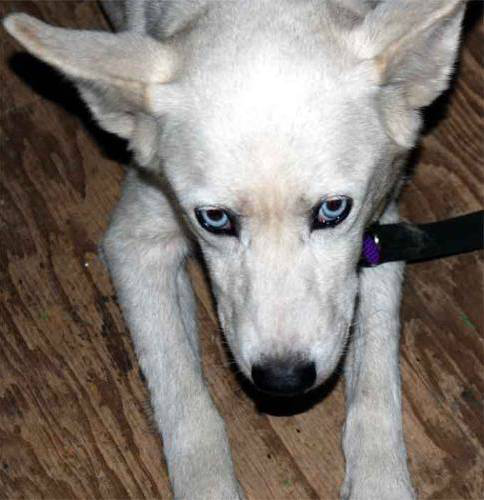

In [7]:
PIL.Image.open(str(dogs[1]))

In [8]:
batch_size = 32
img_height = 64
img_width = 64

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)


['cats', 'dogs']


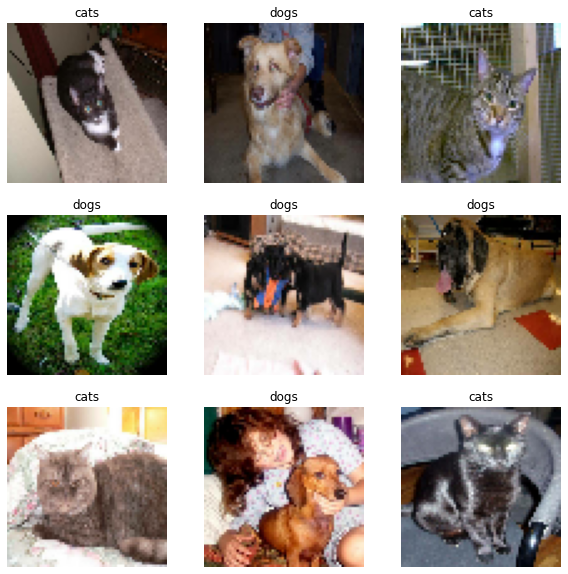

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [13]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 64, 64, 3)
(32,)


In [14]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), kernel_initializer =tf.keras.initializers.GlorotUniform(), padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"),
  #layers.Dropout(0.1),
  layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"),
  layers.Dropout(0.7),
  layers.Flatten(),
  layers.Dense(120, activation='relu'),
  layers.Dense(84, activation='relu'),
  layers.Dense(num_classes)
])


In [17]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0

In [19]:
history= model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)


Epoch 1/20
201/201 [==============================] - 166s 808ms/step - loss: 0.6876 - accuracy: 0.5391 - val_loss: 0.6706 - val_accuracy: 0.6309
Epoch 2/20
201/201 [==============================] - 3s 16ms/step - loss: 0.6530 - accuracy: 0.6083 - val_loss: 0.6374 - val_accuracy: 0.6384
Epoch 3/20
201/201 [==============================] - 3s 16ms/step - loss: 0.6066 - accuracy: 0.6616 - val_loss: 0.6227 - val_accuracy: 0.6602
Epoch 4/20
201/201 [==============================] - 3s 16ms/step - loss: 0.6046 - accuracy: 0.6607 - val_loss: 0.5908 - val_accuracy: 0.6908
Epoch 5/20
201/201 [==============================] - 3s 16ms/step - loss: 0.5819 - accuracy: 0.6797 - val_loss: 0.5851 - val_accuracy: 0.7021
Epoch 6/20
201/201 [==============================] - 3s 16ms/step - loss: 0.5534 - accuracy: 0.7099 - val_loss: 0.6036 - val_accuracy: 0.6952
Epoch 7/20
201/201 [==============================] - 3s 16ms/step - loss: 0.5591 - accuracy: 0.7080 - val_loss: 0.6100 - val_accuracy: 0.6